# Activity: Build a decision tree

## Introduction

A decision tree model can makes predictions for a target based on multiple features. Because decision trees are used across a wide array of industries, becoming proficient in the process of building one will help you expand your skill set in a widely-applicable way.   

For this activity, you work as a consultant for an airline. The airline is interested in predicting whether a future customer would be satisfied with their services given customer feedback given previous customer feedback about their flight experience. The airline would like you to construct and evaluate a model that can accomplish this goal. Specifically, they are interested in knowing which features are most important to customer satisfaction.

The data for this activity includes survey responses from 129,880 customers. It includes data points such as class, flight distance, and in-flight entertainment, among others. In a previous activity, you utilized a binomial logistic regression model to help the airline better understand this data. In this activity, your goal will be to utilize a decision tree model to predict whether or not a customer will be satisfied with their flight experience. 

Because this activity uses a dataset from the industry, you will need to conduct basic EDA, data cleaning, and other manipulations to prepare the data for modeling.

In this activity, you’ll practice the following skills:

* Importing packages and loading data
* Exploring the data and completing the cleaning process
* Building a decision tree model 
* Tuning hyperparameters using `GridSearchCV`
* Evaluating a decision tree model using a confusion matrix and various other plots

## Step 1: Imports

Import relevant Python packages. Use `DecisionTreeClassifier`,` plot_tree`, and various imports from `sklearn.metrics` to build, visualize, and evaluate the model.

### Import packages

In [32]:
# Standard operational package imports
import pandas as pd
import numpy as np

# Important imports for modeling and evaluation
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Visualization package imports
import seaborn as sns
import matplotlib.pyplot as plt

### Load the dataset

`Pandas` is used to load the **Invistico_Airline.csv** dataset. The resulting pandas DataFrame is saved in a variable named `df_original`.

In [33]:
df_original = pd.read_csv("Invistico_Airline.csv")

### Output the first 10 rows of data

In [34]:
df_original.head(n=10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


## Step 2: Data exploration, data cleaning, and model preparation

### Prepare the data

After loading the dataset, prepare the data to be suitable for decision tree classifiers. This includes: 

*   Exploring the data
*   Checking for missing values
*   Encoding the data
*   Renaming a column
*   Creating the training and testing data

### Explore the data

Check the data type of each column. Note that decision trees expect numeric data. 

In [35]:
df_original.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Output unique values 

The `Class` column is ordinal (meaning there is an inherent order that is significant). For example, airlines typically charge more for 'Business' than 'Eco Plus' and 'Eco'. Output the unique values in the `Class` column. 

In [36]:
df_original['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

### Check the counts of the predicted labels

In order to predict customer satisfaction, verify if the dataset is imbalanced. To do this, check the counts of each of the predicted labels. 

In [37]:
print(df_original['satisfaction'].value_counts(dropna=False))
print()
print(df_original['satisfaction'].value_counts(dropna=False, normalize=True))

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

satisfaction
satisfied       0.547328
dissatisfied    0.452672
Name: proportion, dtype: float64


**Question:** How many satisfied and dissatisfied customers were there?

* **Answer:** There are $71087$ satisfied and $58793$ dissatisfied customers.

**Question:** What percentage of customers were satisfied? 

* **Answer:** The satisfaction label is balanced with $54.7\%$ corresponding to satisfied and $45.3\%$ corresponding to dissatified customers.

### Check for missing values

The sklearn decision tree implementation does not support missing values. Check for missing values in the rows of the data. 

In [38]:
df_original.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

**Question:** Why is it important to check how many rows and columns there are in the dataset?

* **Answer:** This allows to determine the size of the dataset as well as how many features are available for analysis. 

### Check the number of rows and columns in the dataset

In [39]:
df_original.shape

(129880, 22)

### Drop the rows with missing values

Drop the rows with missing values and save the resulting pandas DataFrame in a variable named `df_subset`.

In [40]:
df_subset = df_original.dropna(axis=0).reset_index(drop=True)

### Check for missing values

Check that `df_subset` does not contain any missing values.

In [41]:
df_subset.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

### Check the number of rows and columns in the dataset again

Check how many rows and columns are remaining in the dataset. You should now have 393 fewer rows of data.

In [42]:
df_subset.shape

(129487, 22)

### Encode the data

Four columns (`satisfaction`, `Customer Type`, `Type of Travel`, `Class`) are the pandas dtype object. Decision trees need numeric columns. Start by converting the ordinal `Class` column into numeric. 

In [43]:
df_subset['Class'] = df_subset['Class'].replace({"Business": 3, "Eco Plus": 2, "Eco": 1})

/tmp/ipykernel_1173/2415182999.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_subset['Class'] = df_subset['Class'].replace({"Business": 3, "Eco Plus": 2, "Eco": 1})


### Represent the data in the target variable numerically

To represent the data in the target variable numerically, assign `"satisfied"` to the label `1` and `"dissatisfied"` to the label `0` in the `satisfaction` column. 

In [44]:
df_subset['satisfaction'] = df_subset['satisfaction'].map({"satisfied" : 1, "dissatisfied" : 0})
df_subset.head()

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Loyal Customer,65,Personal Travel,1,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,1,Loyal Customer,47,Personal Travel,3,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,1,Loyal Customer,15,Personal Travel,1,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,1,Loyal Customer,60,Personal Travel,1,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,1,Loyal Customer,70,Personal Travel,1,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0


### Convert categorical columns into numeric

There are other columns in the dataset that are still categorical. Be sure to convert categorical columns in the dataset into numeric.

In [45]:
# List categories of 'Customer Type'
df_subset['Customer Type'].value_counts(dropna=False, normalize=True)

Customer Type
Loyal Customer       0.816862
disloyal Customer    0.183138
Name: proportion, dtype: float64

In [46]:
# Convert Customer Type to numeric
df_subset['Customer Type'] = df_subset['Customer Type'].map({'Loyal Customer' :1, 'disloyal Customer' : 0})

In [47]:
df_subset['Type of Travel'].value_counts()

Type of Travel
Business travel    89445
Personal Travel    40042
Name: count, dtype: int64

In [48]:
df_subset['Type of Travel'] = pd.get_dummies(df_subset['Type of Travel'], drop_first=True, dtype=int)
df_subset['Type of Travel'].value_counts()

Type of Travel
0    89445
1    40042
Name: count, dtype: int64

### Check column data types

Now that you have converted categorical columns into numeric, check your column data types.

In [49]:
df_subset.dtypes

satisfaction                           int64
Customer Type                          int64
Age                                    int64
Type of Travel                         int64
Class                                  int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

### Create the training and testing data

Put 75% of the data into a training set and the remaining 25% into a testing set. 

In [50]:
# Separate X and Y data 
X = df_subset.copy()
X = X.drop (columns= ['satisfaction'])
y = df_subset['satisfaction']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

## Step 3: Model building

### Fit a decision tree classifier model to the data

Make a decision tree instance called `decision_tree` and pass in `0` to the `random_state` parameter. This is only so that if other data professionals run this code, they get the same results. Fit the model on the training set, use the `predict()` function on the testing set, and assign those predictions to the variable `dt_pred`. 

In [51]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
dt_pred = decision_tree.predict(X_test)

**Question:** What are some advantages of using decision trees versus other models you have learned about? 

* **Answer:** Decision trees do not require any assumptions about the distributions of the data. Data does not need to be preprocessed, e.g. scaled. 

## Step 4: Results and evaluation

Print out the decision tree model's accuracy, precision, recall, and F1 score.

In [52]:
print(f"Accuracy score:  {accuracy_score(y_test, dt_pred):.3f}")
print(f"Precision score:  {precision_score(y_test, dt_pred):.3f}")
print(f"Recall score:  {recall_score(y_test, dt_pred):.3f}")
print(f"F1 score:  {f1_score(y_test, dt_pred):.3f}")

Accuracy score:  0.936
Precision score:  0.940
Recall score:  0.943
F1 score:  0.942


**Question:** Are there any additional steps you could take to improve the performance or function of your decision tree?

* **Answer:** 
The model could be implemented by performing grid searching and hyperparameter tuning. This can ensure the model is accurate without becoming overfitted. Overfitting is a common issue with decision trees and limiting tree depth can and other parameters can help ensure this doesn't happen. 

### Produce a confusion matrix

Data professionals often like to know the types of errors made by an algorithm. To obtain this information, produce a confusion matrix.

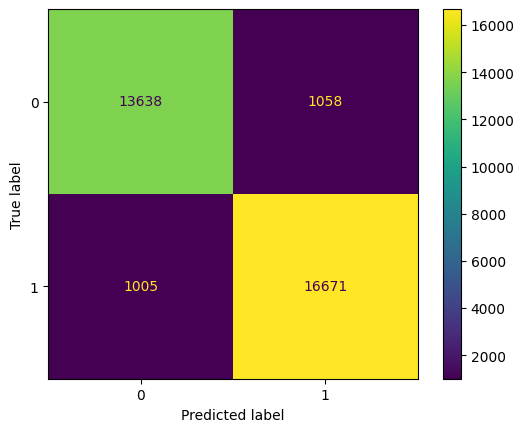

In [53]:
cm = confusion_matrix(y_test, dt_pred, labels=decision_tree.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=decision_tree.classes_)
disp.plot()

**Question:** What patterns can you identify between true positives and true negatives, as well as false positives and false negatives?

* **Answer:** As a proportion, the majority of the data has been correctly classified as true positives and true negatives (satisfied and dissatisfied, respectively). The amount of false positives and false negatives remains at ~1000. Depending on the cost of revenue lost due to dissatisfied customers, a model which has a better recall could be considered. 

### Plot the decision tree

Examine the decision tree. Use `plot_tree` function to produce a visual representation of the tree to pinpoint where the splits in the data are occurring.

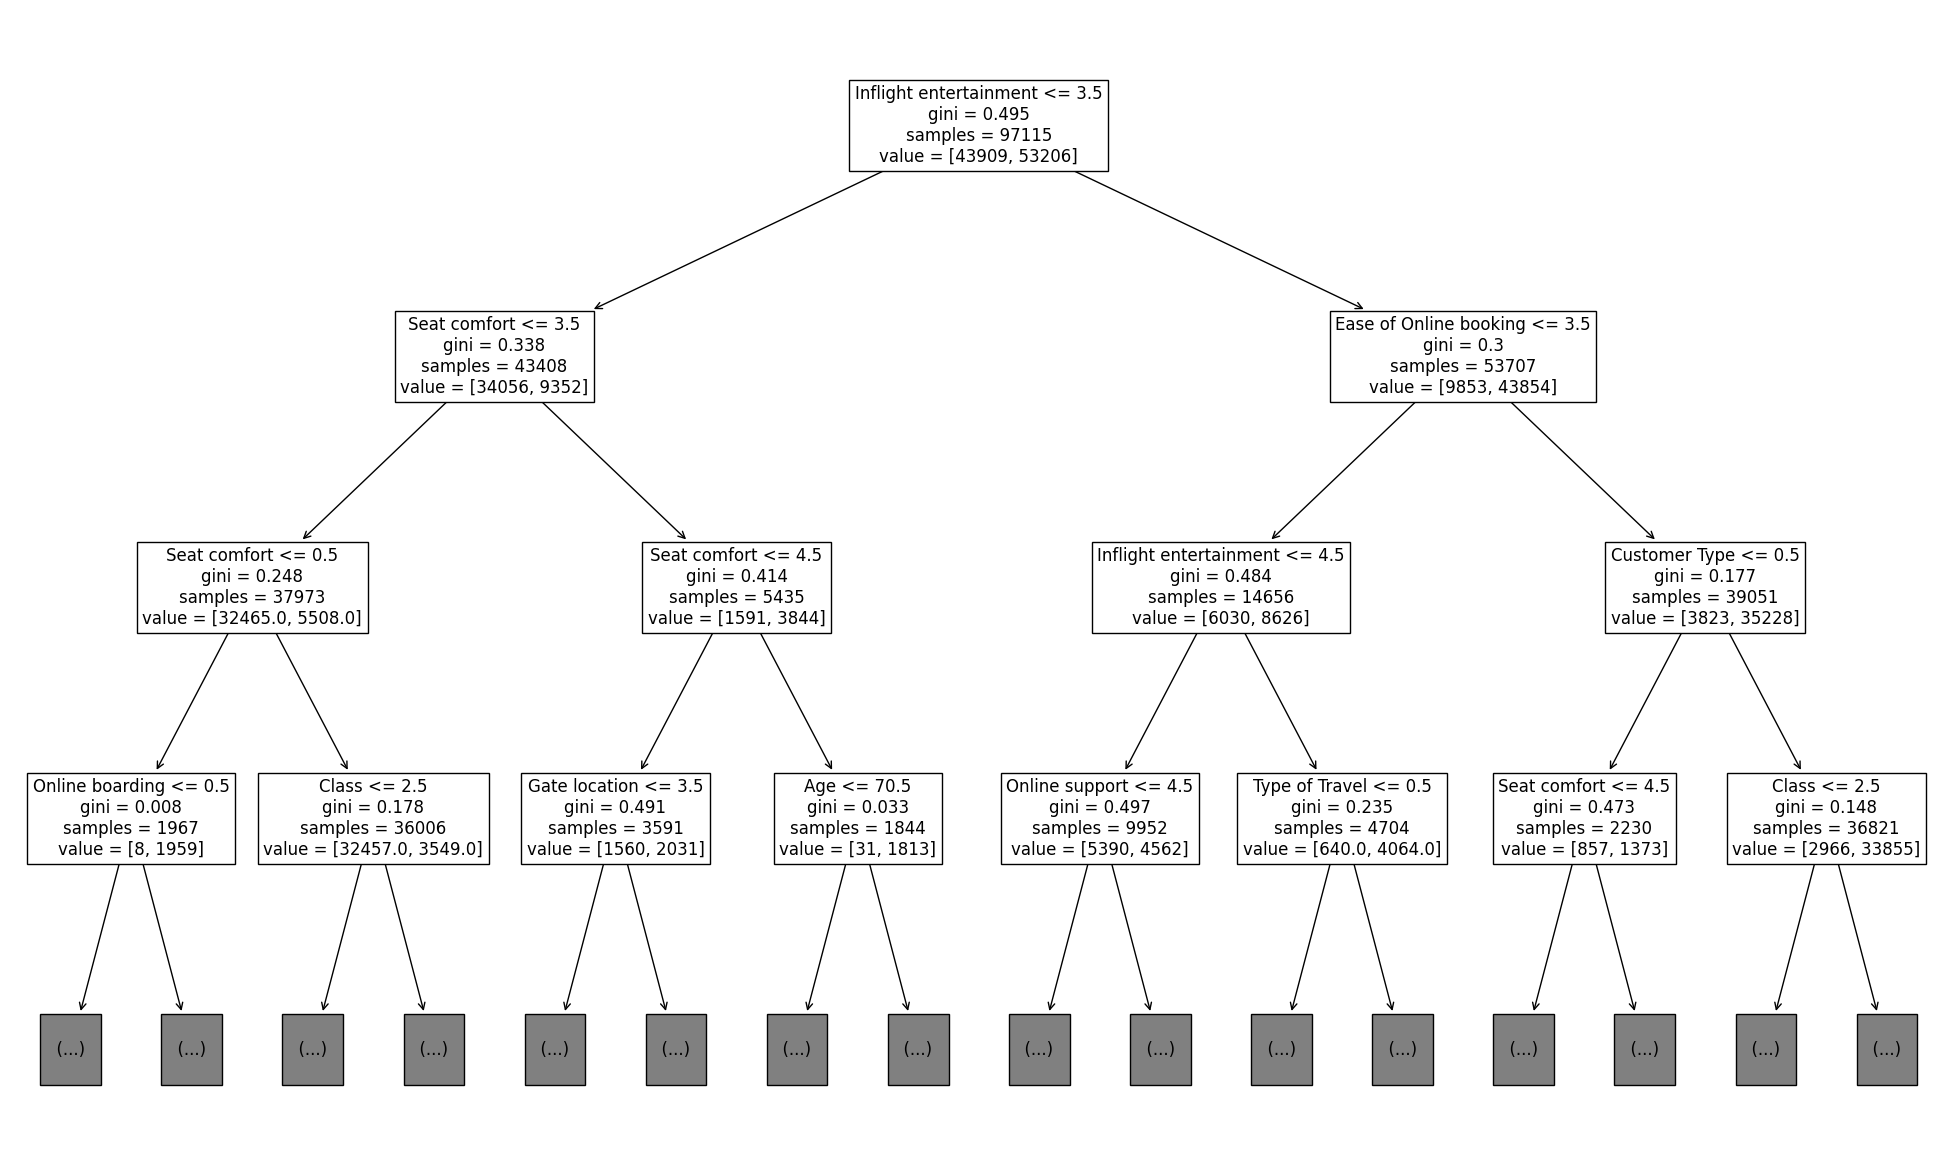

In [54]:
plt.figure(figsize=(25,15))
plot_tree(decision_tree, max_depth=3, fontsize=12, feature_names=X.columns);

### Hyperparameter tuning

Knowing how and when to adjust or tune a model can help a data professional significantly increase performance. In this section, you will find the best values for the hyperparameters `max_depth` and `min_samples_leaf` using grid search and cross validation. Below are some values for the hyperparameters `max_depth` and `min_samples_leaf`.   

In [70]:
tree_para = {'max_depth':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50],
             'min_samples_leaf': [2,3,4,5,6,7,8,9, 10, 15, 20, 50]}

scoring = {
   'accuracy': 'accuracy', 
   'precision': 'precision_macro',  
   'recall': 'recall_macro',        
   'f1': 'f1_macro' }


### Check combinations of values

Check every combination of values to examine which pair has the best evaluation metrics. Make a decision tree instance called `tuned_decision_tree` with `random_state=0`, make a `GridSearchCV` instance called `clf`, make sure to refit the estimator using `"f1"`, and fit the model on the training set. 

**Note:** This cell may take up to 15 minutes to run.

In [71]:
# Create DecisionTreeClassifier instance
tuned_decision_tree = DecisionTreeClassifier (random_state=0)

#Create a grid search classifier intance
clf = GridSearchCV(tuned_decision_tree,
                   tree_para,
                   scoring=scoring,
                   cv=5,
                   refit='f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 30, 40,
                                       50],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10, 15,
                                              20, 50]},
             refit='f1',
             scoring={'accuracy': 'accuracy', 'f1': 'f1_macro',
                      'precision': 'precision_macro',
                      'recall': 'recall_macro'})

**Question:** How can you determine the best combination of values for the hyperparameters? 

* **Answer:** There are several ways of identiftying the best combination of hyperparameters. One way is to run a GridSearchCV algorithm, evaluates all possible combinations of the supplied hyperparameters. Other ways of algorithmically finding thr best hyperparameters include Bayesian optimisation, which constructs a probabilistic model of hyperparameters that optimises a specific metric, or Random Search, which randomly selects hyperparameters to test on each iteration. Once this is done, use the best_estimator_ tool to get the best hyperparameter combination. 

### Compute the best combination of values for the hyperparameters

In [64]:
clf.best_estimator_

DecisionTreeClassifier(max_depth=15, min_samples_leaf=9, random_state=0)

In [72]:
print(sklearn.__version__)

1.4.2


**Question:** What is the best combination of values for the hyperparameters? 

* **Answer:** The best fit model has 

<strong> Question: What was the best average validation score? </strong>

In [59]:
print(f"Best estimator score: {clf.best_score_:.4f}")

Best estimator score: 0.9380


* **Answer:** Best average validation score is 0.9380.

<details>
  <summary><h4><strong>Hint 1</strong> </h4></summary>

Use the `.best_score_` attribute.

</details>

### Determine the "best" decision tree model's accuracy, precision, recall, and F1 score

Print out the decision tree model's accuracy, precision, recall, and F1 score. This task can be done in a number of ways. 

In [60]:
### YOUR CODE HERE

results = pd.DataFrame(columns=[])

def make_results(model_name, model_object):

    # Get all the results from the CV and put them in a df

    # Isolate the row of the df with the max(mean f1 score

    # Extract accuracy, precision, recall, and f1 score from that row

    # Create table of results

SyntaxError: incomplete input (4184900038.py, line 13)

<details>
  <summary><h4><strong>Hint 1</strong></h4></summary>

Get all the results (`.cv_results_`) from the GridSearchCV instance (`clf`).

</details>

<details>
  <summary><h4><strong>Hint 2</strong></h4></summary>

Output `mean_test_f1`, `mean_test_recall`, `mean_test_precision`, and `mean_test_accuracy` from `clf.cv_results_`.
</details>

**Question:** Was the additional performance improvement from hyperparameter tuning worth the computational cost? Why or why not?

[Write your response here. Double-click (or enter) to edit.]

### Plot the "best" decision tree

Use the `plot_tree` function to produce a representation of the tree to pinpoint where the splits in the data are occurring. This will allow you to review the "best" decision tree.

In [ ]:
### YOUR CODE HERE ###

Which features did the model use first to sort the samples?

## Conclusion

**What are some key takeaways that you learned from this lab?**

[Write your response here. Double-click (or enter) to edit.]

**What findings would you share with others?**

[Write your response here. Double-click (or enter) to edit.]

**What would you recommend to stakeholders?**
 
 [Write your response here. Double-click (or enter) to edit.]

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged